## Capstone Mini-Project: Data Wrangling + EDA

### Data Collection and Description
Data is obtained from Kaggle: https://www.kaggle.com/mehdidag/black-friday
The dataset is a sample of transactions made in a retail store for one month. It contains customer demographics such as age, gender and marital status, product details including product id and product category, and purchase amount for the whole month.<br>
Dataset from Kaggle is pretty clean and ready to use, not much data wrangling is required.

### Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
# Read data and inspect the first few rows
retail_data = pd.read_csv('BlackFriday.csv')
retail_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
# Check if there's any duplicated rows
retail_data.duplicated().sum()

0

In [5]:
# Convert column names to lower case
retail_data.columns = [col.lower() for col in retail_data.columns]

In [6]:
# Examine if all column labels are of type string
all(isinstance(column, str) for column in retail_data.columns)

True

In [7]:
# Check the data types for each column and total count of null entries 
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
# Convert categorical features into 'category' data type
for col in ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2','product_category_3']:
    retail_data[col] = retail_data[col].astype('category')

In [9]:
# Further convert age column to ordered category
from pandas.api.types import CategoricalDtype
retail_data['age'].astype(CategoricalDtype(ordered=True))

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
5         26-35
6         46-50
7         46-50
8         46-50
9         26-35
10        26-35
11        26-35
12        26-35
13        26-35
14        51-55
15        51-55
16        51-55
17        51-55
18        36-45
19        26-35
20        26-35
21        26-35
22        26-35
23        26-35
24        26-35
25        26-35
26        26-35
27        26-35
28        26-35
29        36-45
          ...  
537547    18-25
537548    51-55
537549    51-55
537550    46-50
537551    46-50
537552    46-50
537553    46-50
537554    46-50
537555    46-50
537556    18-25
537557    18-25
537558    18-25
537559    18-25
537560    18-25
537561    18-25
537562    18-25
537563    18-25
537564    18-25
537565    18-25
537566    18-25
537567    18-25
537568    18-25
537569    18-25
537570    18-25
537571    36-45
537572    36-45
537573    36-45
537574    36-45
537575    36-45
537576    36-45
Name: age, Length: 53757

In [10]:
# See how many categories in each categorial column
for col in ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2', 'product_category_3']:
    print('{}: {}' .format(col, retail_data[col].cat.categories))

gender: Index(['F', 'M'], dtype='object')
age: Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object')
occupation: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')
city_category: Index(['A', 'B', 'C'], dtype='object')
stay_in_current_city_years: Index(['0', '1', '2', '3', '4+'], dtype='object')
marital_status: Int64Index([0, 1], dtype='int64')
product_category_1: Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')
product_category_2: Float64Index([ 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
             dtype='float64')
product_category_3: Float64Index([ 3.0,  4.0,  5.0,  6.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0,
              15.0, 16.0, 17.0, 18.0],
             dtype='float64')


From retail_data.info(), we find that only product_category_2 and product_category_3 have null entries. Use value_counts to futher check if there are other missing values not in the form of 'NaN'. 

In [11]:
for col in retail_data.columns:
    print('Value counts for {} is \n{}'.format(col, retail_data[col].value_counts().head(20)))

Value counts for user_id is 
1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
1003618     766
1001150     752
1001015     739
1002909     717
1001449     714
1002063     708
1004344     705
1003391     697
1003841     697
1000424     694
1004510     690
1001980     684
1005795     680
1001088     679
1004227     676
Name: user_id, dtype: int64
Value counts for product_id is 
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
Name: product_id, dtype: int64
Value counts for gender is 
M    405380
F    132197
Name: gender, dtype: int64
Value counts for age is 
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903


It seems that there are no missing values in other forms. Then investigate a little bit more about the two columns having null entries. Notice that product_category_1 has 18 categories from 1 to 18, product_category_2 has 17 categories from 2 to 18, and product_category_3 has 16 categories from 3 to 18. 

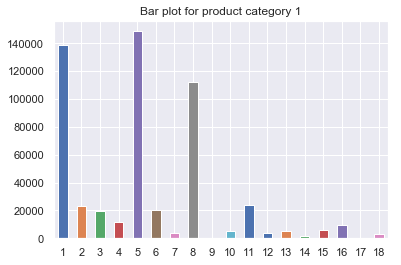

In [12]:
retail_data['product_category_1'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar plot for product category 1')
plt.xticks(rotation=360);

Three most popular categories regarding product category 1 are 1, 5, and 8.

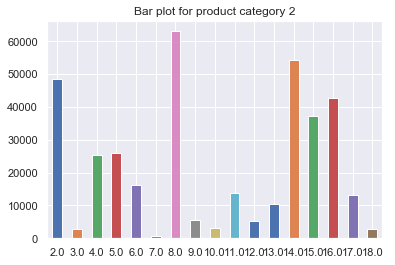

In [13]:
retail_data['product_category_2'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar plot for product category 2')
plt.xticks(rotation=360);

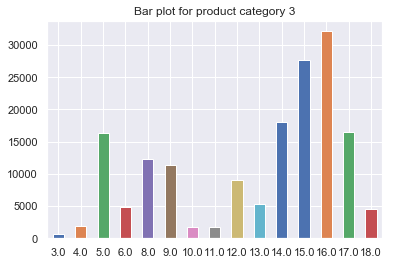

In [14]:
retail_data['product_category_3'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar plot for product category 3')
plt.xticks(rotation=360);

In [15]:
retail_data[retail_data['product_category_2'].isnull()].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [16]:
# Find for those nan value products in product_category_2, what categories are they in product_category_1? 
retail_data[retail_data['product_category_2'].isnull()]['product_category_1'].value_counts()

5     62788
8     59828
11    12202
16     9697
1      6498
7      3371
18     3075
15     2797
12     1748
14     1085
6       979
2       910
13      618
17      567
10      447
3       233
4       142
9         1
Name: product_category_1, dtype: int64

In [17]:
retail_data[retail_data['product_category_3'].isnull()]['product_category_2'].value_counts()

14.0    42352
16.0    41732
8.0     36528
15.0    23032
17.0    13130
5.0     10258
11.0     8239
4.0      6012
2.0      5588
13.0     4341
6.0      4272
12.0     4060
18.0     2730
9.0      2657
10.0      767
7.0       615
3.0         0
Name: product_category_2, dtype: int64

In [18]:
retail_data[retail_data['product_category_2'].isnull() & retail_data['product_category_3'].notnull()]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase


In [19]:
category_12= retail_data[['product_category_1','product_category_2']]
category_12.groupby(['product_category_1','product_category_2']).size()

product_category_1  product_category_2
1                   2.0                   48481
                    3.0                     118
                    4.0                     676
                    5.0                   11127
                    6.0                   10507
                    8.0                   15251
                    11.0                   4761
                    13.0                   1008
                    14.0                   4496
                    15.0                  18281
                    16.0                  14602
                    17.0                   1842
                    18.0                    705
2                   3.0                    2717
                    4.0                    7997
                    5.0                    4099
                    6.0                     185
                    8.0                    2577
                    9.0                    1488
                    12.0                    142
 

In [20]:
category_23 = retail_data[['product_category_2','product_category_3']]
category_23.groupby(['product_category_2','product_category_3']).size()

product_category_2  product_category_3
2.0                 3.0                     600
                    4.0                     513
                    5.0                    7877
                    6.0                    1903
                    8.0                    2765
                    9.0                    4350
                    11.0                   1559
                    13.0                   1333
                    14.0                   3487
                    15.0                  14657
                    16.0                   3443
                    17.0                    194
                    18.0                    212
3.0                 4.0                    1327
                    10.0                    968
                    15.0                    540
4.0                 5.0                    8503
                    8.0                    1593
                    9.0                    3682
                    12.0                   4796
 

For now, we know that all products must be within a category under product_category_1. <br>
Some of them belong to a category under product_category_2 and some not.<br>
There is no product that not belongs to a category in product_category_2 while belongs to a category in product_category_3. <br>
The category under product_category_1 for a product must be lower than its category under the other two categories. for example, if this product is in category 5 for product_category_1, then it's category must be greater than 5 for product_category_2, let's say it's 8, then for product_category_3, it must be greater than 8.

#### Investigate purchase column to see if there's any outliers

In [21]:
retail_data['purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: purchase, dtype: float64

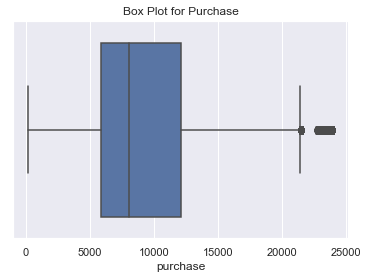

In [22]:
sns.boxplot(retail_data['purchase'])
plt.title('Box Plot for Purchase');

In [23]:
# compute interquartile range and threshold for identifying outliers
IQR = retail_data['purchase'].describe()[6] - retail_data['purchase'].describe()[4]
threshold = retail_data['purchase'].describe()[6] + (1.5 * IQR)
len(retail_data[retail_data['purchase'] > threshold])

2665

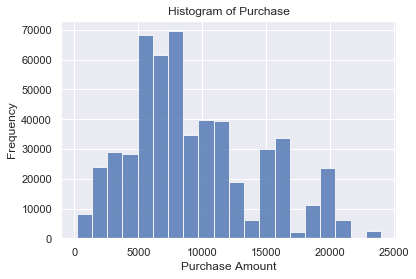

In [24]:
retail_data['purchase'].plot(kind='hist', bins=20, alpha=0.8)
plt.title('Histogram of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency');

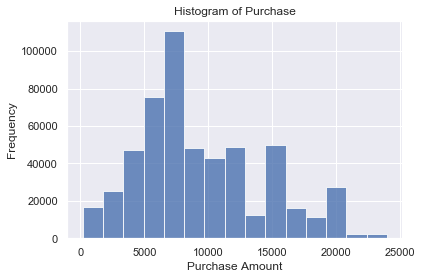

In [25]:
retail_data['purchase'].plot(kind='hist', bins=15, alpha=0.8)
plt.title('Histogram of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency');

#### How many consumers?

In [26]:
retail_data['user_id'].nunique()

5891

#### How many unique kinds of products were sold?

In [27]:
retail_data['product_id'].nunique()

3623

There are 5891 consumers and 3623 products in our data set.

#### Get a new data frame for each consumers' individual features

In [28]:
user_info = retail_data.groupby('user_id')[['gender', 'age', 'occupation', 'city_category', 
                                         'stay_in_current_city_years', 'marital_status']].first()
user_info.reset_index(inplace=True)
user_info.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1


In [29]:
user_info.shape

(5891, 7)

#### Gender distribution

In [30]:
gender_counts = user_info.gender.value_counts()
gender_counts

M    4225
F    1666
Name: gender, dtype: int64

In [31]:
gender_prop = gender_counts / len(user_info.gender)
gender_prop

M    0.717196
F    0.282804
Name: gender, dtype: float64

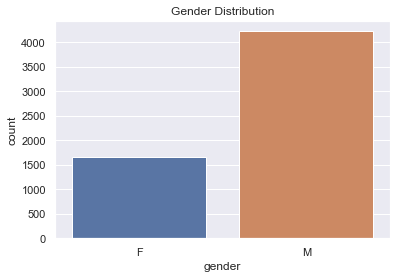

In [32]:
sns.countplot(user_info['gender'])
plt.title('Gender Distribution');

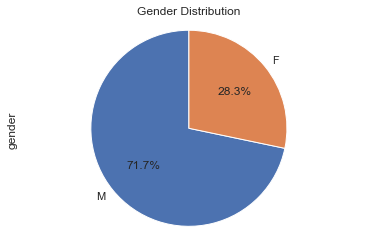

In [33]:
user_info.gender.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal');

#### Total Purchase Amount by Gender

In [34]:
total_purchase_by_gen = retail_data.groupby('gender')['purchase'].sum()
total_purchase_by_gen

gender
F    1164624021
M    3853044357
Name: purchase, dtype: int64

In [35]:
# Percentage of purchase made by female and male
purchase_by_gen_prop = total_purchase_by_gen / retail_data['purchase'].sum()
purchase_by_gen_prop

gender
F    0.232105
M    0.767895
Name: purchase, dtype: float64

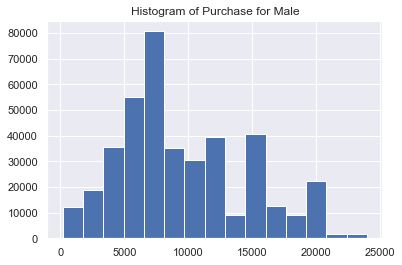

In [99]:
retail_data[retail_data['gender'] == 'M']['purchase'].hist(bins=15)
plt.title('Histogram of Purchase for Male');

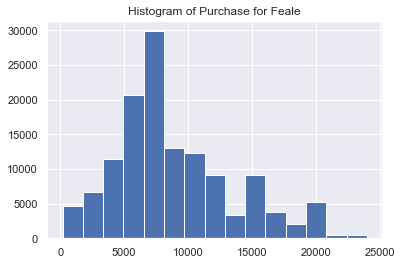

In [98]:
retail_data[retail_data['gender'] == 'F']['purchase'].hist(bins=15)
plt.title('Histogram of Purchase for Feale');

#### Average Purchase Amount for Female and Male Consumers

In [36]:
avg_purchase_by_gen = retail_data.groupby('gender')['purchase'].sum() / user_info.gender.value_counts()
avg_purchase_by_gen

F    699054.034214
M    911963.161420
dtype: float64

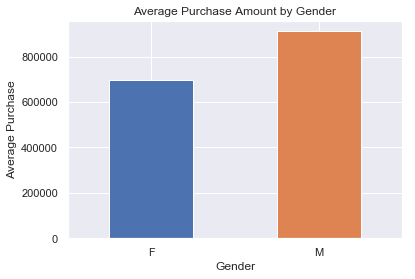

In [37]:
avg_purchase_by_gen.plot(kind='bar')
plt.title('Average Purchase Amount by Gender')
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Average Purchase');

In [38]:
pur_by_gen = pd.concat([gender_counts, gender_prop * 100, total_purchase_by_gen, purchase_by_gen_prop * 100, avg_purchase_by_gen],
                       axis=1)
pur_by_gen.columns = ['count', 'gender_proportion (%)', 'total_purchase', 'purchase_proportion (%)', 'average_purchase']
pur_by_gen

,count,gender_proportion (%),total_purchase,purchase_proportion (%),average_purchase
F,1666,28.280428,1164624021,23.210462,699054.034214
M,4225,71.719572,3853044357,76.789538,911963.161420


Female accounts for 28.28% of all consumers, they spent 23.21% of total purchase. 

In [39]:
# Add a new column of total purchase for each user to user_info data frame 
total_purchase = retail_data.groupby(['user_id']).purchase.sum()
user_total_purchase = user_info.set_index('user_id')
user_total_purchase['total_purchase'] = total_purchase
user_total_purchase.head()

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,total_purchase
user_id,,,,,,,
1000001,F,0-17,10,A,2,0,333481
1000002,M,55+,16,C,4+,0,810353
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,205987
1000005,M,26-35,20,A,1,1,821001


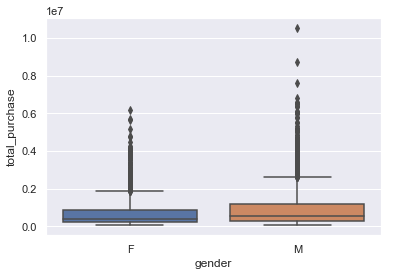

In [40]:
sns.boxplot(x='gender', y='total_purchase', data=user_total_purchase);

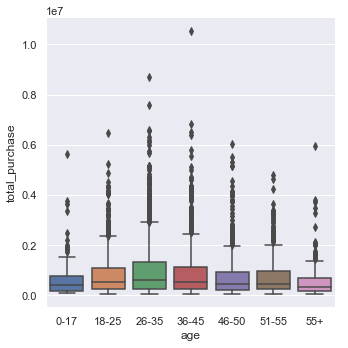

In [41]:
sns.catplot(x="age", y="total_purchase", kind="box", data=user_total_purchase.sort_values('age'));

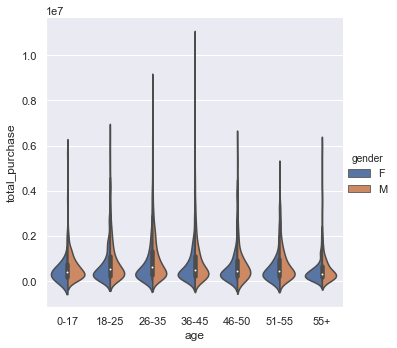

In [42]:
sns.catplot(x="age", y="total_purchase", hue="gender",
            kind="violin", split=True, data=user_total_purchase.sort_values('age'));

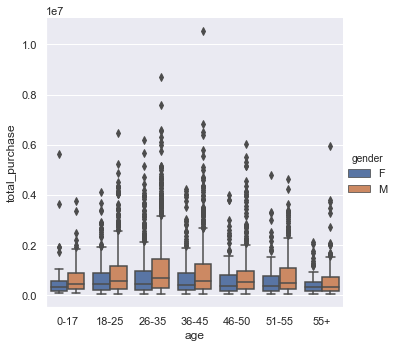

In [43]:
sns.catplot(x="age", y="total_purchase", hue="gender", kind="box", data=user_total_purchase.sort_values('age'));

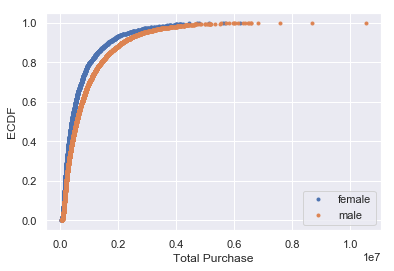

In [44]:
# Plot empirical cumulative distribution for female and male consumers
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)
    y  = np.arange(1, n+1) / n

    return x, y

x_fem, y_fem = ecdf(user_total_purchase[user_total_purchase['gender'] == 'F'].total_purchase)
x_male, y_male = ecdf(user_total_purchase[user_total_purchase['gender'] == 'M'].total_purchase)

plt.plot(x_fem, y_fem, marker='.', linestyle='none')
plt.plot(x_male, y_male, marker='.', linestyle='none')
plt.xlabel('Total Purchase')
plt.ylabel('ECDF')
plt.legend(('female', 'male'))

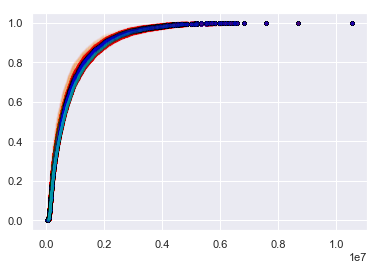

In [45]:
# Do permutation sampling ecdf plots to see if female and male purchase have the same distribution
female_total_purchase = user_total_purchase[user_total_purchase['gender'] == 'F'].total_purchase
male_total_purchase = user_total_purchase[user_total_purchase['gender'] == 'M'].total_purchase

total_purchase = np.concatenate((female_total_purchase, male_total_purchase))

for i in range(1000):
    perm_purchase = np.random.permutation(total_purchase)
    
    perm_female = perm_purchase[:len(female_total_purchase)]
    perm_male = perm_purchase[len(female_total_purchase):]
    
    x_1, y_1 = ecdf(perm_female)
    x_2, y_2 = ecdf(perm_male)
    
    plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)
    
x_fem, y_fem = ecdf(user_total_purchase[user_total_purchase['gender'] == 'F'].total_purchase)
x_male, y_male = ecdf(user_total_purchase[user_total_purchase['gender'] == 'M'].total_purchase)

plt.plot(x_fem, y_fem, marker='.', linestyle='none', color='orange', alpha = 0.01)
plt.plot(x_male, y_male, marker='.', linestyle='none', color='aqua', alpha = 0.01);   

In [46]:
# Conduct a two-sided test for the null hypothesis that two samples of female purchase 
# and male purchase are drawn from the same distribution
from scipy import stats

stats.ks_2samp(user_total_purchase[user_total_purchase['gender'] == 'F'].total_purchase, 
              user_total_purchase[user_total_purchase['gender'] == 'M'].total_purchase)

Ks_2sampResult(statistic=0.12196907165232951, pvalue=5.64334083670315e-16)

p-value is extremely small, then we reject the null that the distributions of the two samples are the same.

In [47]:
# Conduct a two sided test for the null hypothesis that female average purchase and male average purchase
# are not the same.
stats.ttest_ind(user_total_purchase[user_total_purchase['gender'] == 'F'].total_purchase, 
              user_total_purchase[user_total_purchase['gender'] == 'M'].total_purchase, equal_var=False)

Ttest_indResult(statistic=-8.65416276342633, pvalue=7.282558708079996e-18)

p-value is also extremely small for this test, thus we reject the null that two samples have identical means.

#### Age Distribution

In [48]:
user_info.age.value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: age, dtype: int64

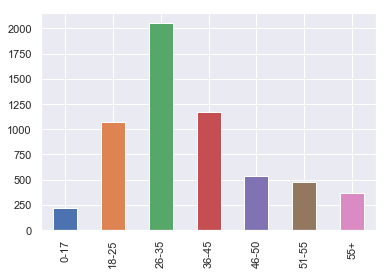

In [49]:
user_info.age.value_counts().sort_index().plot(kind='bar');

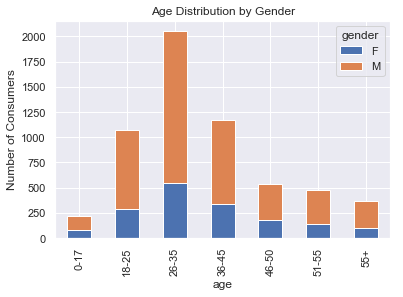

In [50]:
user_info.groupby(['age', 'gender'])['user_id'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Age Distribution by Gender')
plt.ylabel('Number of Consumers');

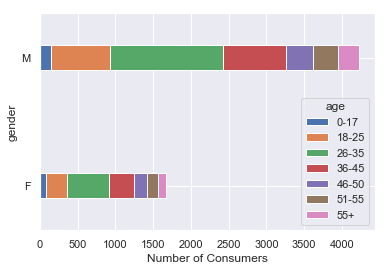

In [51]:
user_info.groupby(['gender', 'age'])['user_id'].count().unstack().plot(kind='barh', width=0.2, stacked=True)
plt.xlabel('Number of Consumers');

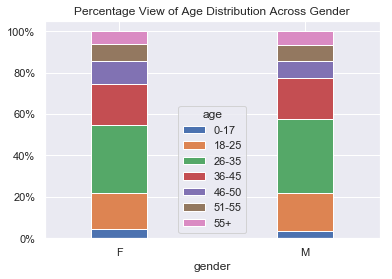

In [52]:
import matplotlib.ticker as mtick
user_info.groupby(['gender', 'age'])['user_id'].size().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation='horizontal')
plt.title('Percentage View of Age Distribution Across Gender');

#### What are the most common bought products?

In [53]:
retail_data['product_id'].value_counts().head()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: product_id, dtype: int64

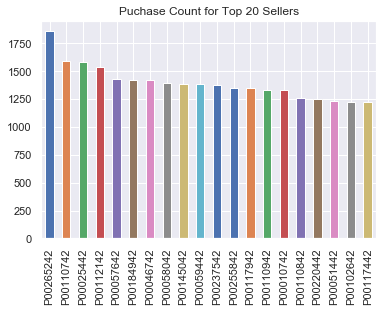

In [54]:
top_20 = retail_data['product_id'].value_counts().head(20)
top_20.plot(kind='bar')
plt.title('Puchase Count for Top 20 Sellers');

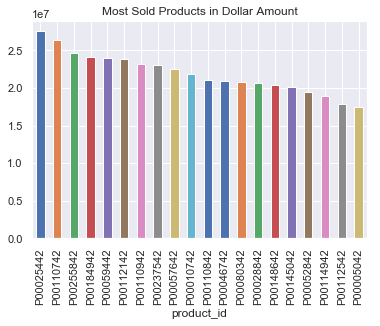

In [110]:
top_20_value = retail_data.groupby('product_id').purchase.sum().nlargest(20)
top_20_value.plot(kind='bar')
plt.title('Most Sold Products in Dollar Amount');

The most common bought product, P00265242, is not in the top 20 list evaluated with dollar value sold. Let's check the two top 1 products separately.

In [55]:
# First let's check P00265242, with the greatest number of purchases.
retail_data[retail_data['product_id'] == 'P00265242'].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,8593


After examining the best seller P00265242, we find that for the same product, the prices paid are different. Let's plot a histogram for the price of this product.

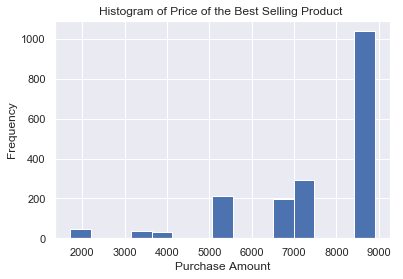

In [119]:
retail_data[retail_data['product_id'] == 'P00265242'].purchase.plot(kind='hist', bins=15)
plt.title('Histogram of Price of the Best Selling Product ')
plt.xlabel('Purchase Amount');

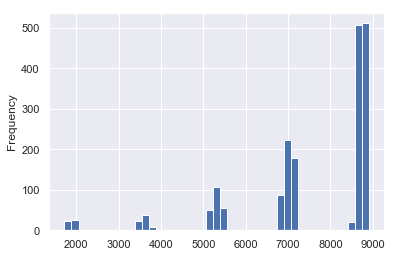

In [117]:
# use a rule of thumb to determin the number of bins
import numpy as np
n_data = len(retail_data[retail_data['product_id'] == 'P00265242'].purchase)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
retail_data[retail_data['product_id'] == 'P00265242'].purchase.plot(kind='hist', bins=n_bins);

In [57]:
retail_data[retail_data['product_id'] == 'P00265242'].purchase.describe()

count    1858.000000
mean     7526.009150
std      1690.048472
min      1720.000000
25%      6945.250000
50%      8603.500000
75%      8760.750000
max      8907.000000
Name: purchase, dtype: float64

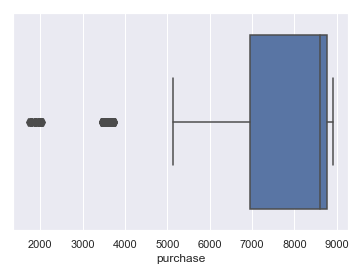

In [58]:
sns.boxplot(retail_data[retail_data['product_id'] == 'P00265242'].purchase);

My guess would be that purchase column is not representing the unit price. We do not know how many units each consumer has bought for this product.

In [116]:
# Then check P00025442, the largest sale in dollar in this store. 
retail_data[retail_data['product_id'] == 'P00025442'].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
667,1000130,P00025442,M,36-45,17,B,3,1,1,2.0,9.0,19706
749,1000142,P00025442,M,26-35,7,A,2,0,1,2.0,9.0,15212
833,1000150,P00025442,M,36-45,7,B,0,1,1,2.0,9.0,15255
1134,1000192,P00025442,M,18-25,1,B,2,0,1,2.0,9.0,15223
1205,1000198,P00025442,M,26-35,12,A,0,1,1,2.0,9.0,19296


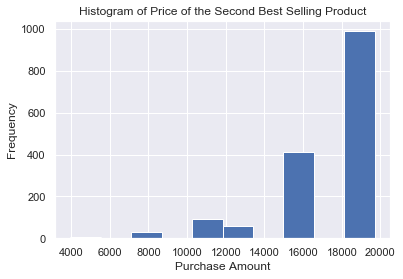

In [120]:
retail_data[retail_data['product_id'] == 'P00025442'].purchase.plot(kind='hist')
plt.title('Histogram of Price of the Second Best Selling Product')
plt.xlabel('Purchase Amount');

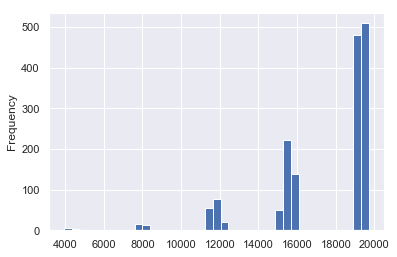

In [121]:
# use a rule of thumb to determin the number of bins
import numpy as np
n_data = len(retail_data[retail_data['product_id'] == 'P00025442'].purchase)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
retail_data[retail_data['product_id'] == 'P00025442'].purchase.plot(kind='hist', bins=n_bins);

In [122]:
retail_data[retail_data['product_id'] == 'P00025442'].purchase.describe()

count     1586.000000
mean     17359.663304
std       2932.299319
min       3961.000000
25%      15569.000000
50%      19086.000000
75%      19409.000000
max      19707.000000
Name: purchase, dtype: float64

Numer of purchases for product P00265242 is 1858, while for product P00025442 is 1586. <br>
Mean purchase amount for product P00265242 is 7526, while for product P00025442 is 17359.66.

#### What are the categories for those most popular products?

In [62]:
most_pop = retail_data['product_id'].value_counts().head()
most_pop_list = list(most_pop.keys())

In [63]:
retail_data[retail_data['product_id'].isin(most_pop_list)][['product_id','product_category_1', 'product_category_2', 
                                                            'product_category_3']].drop_duplicates()

,product_id,product_category_1,product_category_2,product_category_3
235,P00112142,1,2.0,14.0
342,P00110742,1,2.0,8.0
399,P00265242,5,8.0,NaN
667,P00025442,1,2.0,9.0
1004,P00057642,1,15.0,16.0


In [64]:
# Other products in the same category as the best seller P00112142
retail_data[(retail_data.product_category_1 == 1) & (retail_data.product_category_2 == 2.0) 
           & (retail_data.product_category_3 == 14.0)].product_id.value_counts()

P00112142    1539
P00070342     590
P00090942     569
P00182742     529
P00346442     192
P00001542      68
Name: product_id, dtype: int64

Measured by the total dollar spent, the top one is product P00025442 which ranks the third on the best seller list measured by the number of consumers. 

#### What are the most common bought products for female and male consumers respectively?

In [65]:
retail_data[retail_data['gender'] == 'M'].product_id.value_counts().head()

P00265242    1353
P00025442    1245
P00110742    1234
P00112142    1207
P00057642    1174
Name: product_id, dtype: int64

In [66]:
female_pop = retail_data[retail_data['gender'] == 'F'].product_id.value_counts().head()
female_pop

P00265242    505
P00220442    427
P00058042    378
P00255842    366
P00034742    358
Name: product_id, dtype: int64

The best seller for the overall population 'P00265242' is also the most popular one for both female and male consumers. The next four most popular products are not the same for female and male.

In [67]:
# What categories are the most popular products for female in?
female_pop_list = list(female_pop.keys())
retail_data[retail_data['product_id'].isin(female_pop_list)][['product_id','product_category_1', 'product_category_2', 
                                                            'product_category_3']].drop_duplicates()

,product_id,product_category_1,product_category_2,product_category_3
20,P00220442,5,14.0,NaN
234,P00255842,16,NaN,NaN
399,P00265242,5,8.0,NaN
462,P00034742,5,14.0,17.0
1381,P00058042,8,16.0,NaN


#### Age Distribution for the best seller

In [68]:
best_sell_data = retail_data[retail_data['product_id'] == 'P00265242']
best_sell_data.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,8593


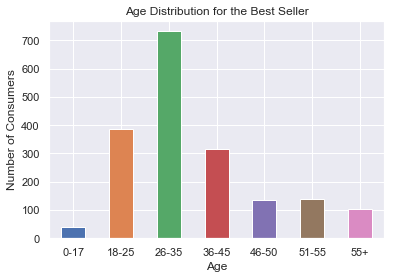

In [69]:
best_sell_data.age.value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution for the Best Seller')
plt.xlabel('Age')
plt.xticks(rotation=360)
plt.ylabel('Number of Consumers');

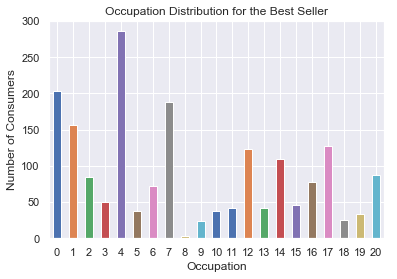

In [70]:
best_sell_data.occupation.value_counts().sort_index().plot(kind='bar')
plt.title('Occupation Distribution for the Best Seller')
plt.xlabel('Occupation')
plt.xticks(rotation=360)
plt.ylabel('Number of Consumers');

From the bar graph, for this product, many consumers are aged between 26 and 35. How about total purchase amount for each age group?

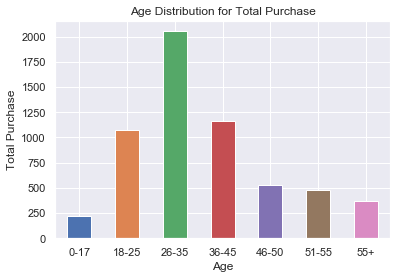

In [71]:
user_total_purchase.age.value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution for Total Purchase')
plt.xlabel('Age')
plt.xticks(rotation=360)
plt.ylabel('Total Purchase');

Not only for the top one selling product, consumers aged 25-36 also account for the highest proportion of total purchase.

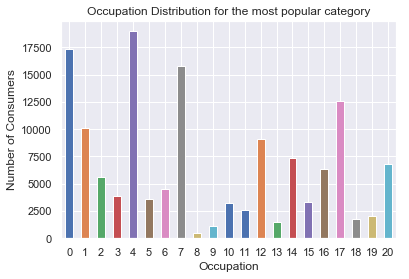

In [72]:
retail_data[retail_data['product_category_1'] == 1].occupation.value_counts().sort_index().plot(kind='bar')
plt.title('Occupation Distribution for the most popular category')
plt.xlabel('Occupation')
plt.xticks(rotation=360)
plt.ylabel('Number of Consumers');

#### Product Category 1 distribution for each age group

In [73]:
table_age = retail_data[['user_id', 'age', 'product_category_1']].pivot_table(index='age', 
        columns='product_category_1', aggfunc='count', margins=True)
table_age.columns = table_age.columns.droplevel(0)
table_age

product_category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,All
age,,,,,,,,,,,,,,,,,,,
0-17,3524,789,1180,744,4280,392,51,2213,16,108,728,120,108,37,158,226,6,27,14707
18-25,26627,4348,4633,2436,28157,3711,474,17665,61,596,4549,435,748,228,1010,1579,41,336,97634
26-35,57398,8784,7524,4124,60487,8344,1630,43533,151,1757,9735,1072,2055,553,2341,4056,125,1021,214690
36-45,27215,4856,3785,2311,28936,3839,796,22919,106,1206,4884,981,1223,308,1377,1935,133,689,107499
46-50,10292,2068,1343,971,11736,1596,322,10493,33,513,2072,507,537,149,589,868,91,346,44526
51-55,8950,1763,908,666,9720,1429,263,9202,29,507,1440,428,475,151,500,661,106,420,37618
55+,4347,891,476,315,5276,853,132,6107,8,345,552,332,294,74,228,372,65,236,20903
All,138353,23499,19849,11567,148592,20164,3668,112132,404,5032,23960,3875,5440,1500,6203,9697,567,3075,537577


In [74]:
# Separate the above table by gender
table_age_gender = retail_data[['user_id', 'gender', 'age', 'product_category_1']].pivot_table(index=['gender', 'age'], 
        columns='product_category_1', aggfunc='count', margins=True)
table_age_gender.columns = table_age_gender.columns.droplevel(0)
table_age_gender

product_category_1       1      2      3      4       5      6     7       8  \
gender age                                                                     
F      0-17            759    362    497    381    1492     88     8     847   
       18-25          4579   1135   1484    771    7809    760   100    5112   
       26-35          9202   1815   1863   1132   16261   1715   388   12446   
       36-45          5164   1181   1153    686    7671    953   216    6466   
       46-50          2449    512    440    308    3680    434   101    3505   
       51-55          1575    390    293    206    2932    348    81    2819   
       55+             673    178    144     88    1354    177    34    1752   
M      0-17           2765    427    683    363    2788    304    43    1366   
       18-25         22048   3213   3149   1665   20348   2951   374   12553   
       26-35         48196   6969   5661   2992   44226   6629  1242   31087   
       36-45         22051   3675   2632   1625   21265   2886   580   16453   
       46-50          7843   1556    903    663    8056   1162   221    6988   
       51-55          7375   1373    615    460    6788   1081   182    6383   
       55+            3674    713    332    227    3922    676    98    4355   
All                 138353  23499  19849  11567  148592  20164  3668  112132   

product_category_1    9    10     11    12    13    14    15    16   17    18  \
gender age                                                                      
F      0-17           5    29    236    80    34    23    42    60    2     8   
       18-25         12   118   1034   214   202    92   168   414    8    45   
       26-35         23   355   1643   401   481   229   353   933    5   103   
       36-45         17   276    989   346   342   127   226   500   23    84   
       46-50          6   134    440   197   156    56   117   245    8    68   
       51-55          5   128    227   149   142    63    79   156    7    34   
       55+            2    98     90   110    71    23    38    55    8    34   
M      0-17          11    79    492    40    74    14   116   166    4    19   
       18-25         49   478   3515   221   546   136   842  1165   33   291   
       26-35        128  1402   8092   671  1574   324  1988  3123  120   918   
       36-45         89   930   3895   635   881   181  1151  1435  110   605   
       46-50         27   379   1632   310   381    93   472   623   83   278   
       51-55         24   379   1213   279   333    88   421   505   99   386   
       55+            6   247    462   222   223    51   190   317   57   202   
All                 404  5032  23960  3875  5440  1500  6203  9697  567  3075   

product_category_1     All  
gender age                  
F      0-17           4953  
       18-25         24057  
       26-35         49348  
       36-45         26420  
       46-50         12856  
       51-55          9634  
       55+            4929  
M      0-17           9754  
       18-25         73577  
       26-35        165342  
       36-45         81079  
       46-50         31670  
       51-55         27984  
       55+           15974  
All                 537577

#### What are the popular items for each group?

In [75]:
retail_data[retail_data.age == '0-17'].product_id.value_counts().sort_values(ascending=False).head()

P00255842    64
P00145042    63
P00112142    58
P00242742    56
P00034742    55
Name: product_id, dtype: int64

In [76]:
retail_data[retail_data.age == '18-25'].product_id.value_counts().sort_values(ascending=False).head()

P00265242    388
P00112142    335
P00110742    323
P00237542    295
P00046742    293
Name: product_id, dtype: int64

In [77]:
retail_data[retail_data.age == '26-35'].product_id.value_counts().sort_values(ascending=False).head()

P00265242    732
P00110742    627
P00112142    597
P00025442    595
P00058042    584
Name: product_id, dtype: int64

In [78]:
retail_data[retail_data.age == '36-45'].product_id.value_counts().sort_values(ascending=False).head()

P00025442    348
P00110742    317
P00265242    317
P00112142    292
P00057642    291
Name: product_id, dtype: int64

In [79]:
retail_data[retail_data.age == '46-50'].product_id.value_counts().sort_values(ascending=False).head()

P00265242    136
P00046742    126
P00025442    122
P00051442    120
P00117942    118
Name: product_id, dtype: int64

In [80]:
retail_data[retail_data.age == '51-55'].product_id.value_counts().sort_values(ascending=False).head()

P00265242    140
P00110742    117
P00025442    117
P00059442    112
P00010742    110
Name: product_id, dtype: int64

In [81]:
retail_data[retail_data.age == '55+'].product_id.value_counts().sort_values(ascending=False).head()

P00265242    104
P00080342     79
P00051442     78
P00184942     70
P00025442     70
Name: product_id, dtype: int64

#### Marital Status Distribution Comparison

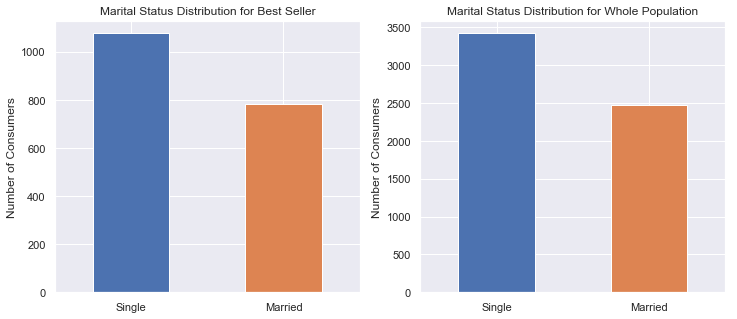

In [82]:
fig, axes = plt.subplots(1, 2)
best_sell_data.marital_status.value_counts().sort_index().plot(kind='bar', ax=axes[0], figsize=(12, 5))
axes[0].set_title('Marital Status Distribution for Best Seller')
axes[0].set_ylabel('Number of Consumers')
axes[0].set_xticklabels(labels=['Single', 'Married'], rotation=360)
user_info.marital_status.value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Marital Status Distribution for Whole Population')
axes[1].set_xticklabels(labels=['Single', 'Married'], rotation=360)
axes[1].set_ylabel('Number of Consumers');

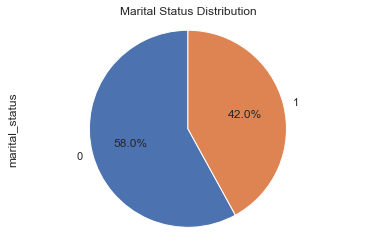

In [100]:
user_info.marital_status.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Marital Status Distribution')
plt.axis('equal');

There are slightly more single costumoers shopping in this store.

#### Occupation Distribution

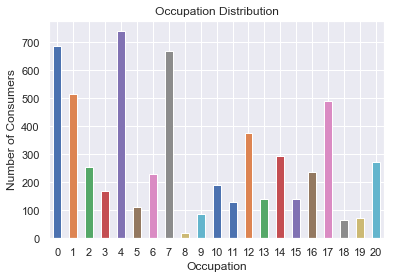

In [83]:
user_info.occupation.value_counts().sort_index().plot(kind='bar')
plt.title('Occupation Distribution')
plt.xticks(rotation=360)
plt.xlabel('Occupation')
plt.ylabel('Number of Consumers');

Most of the consumers come from occupation 0, 4, 7, and 17.

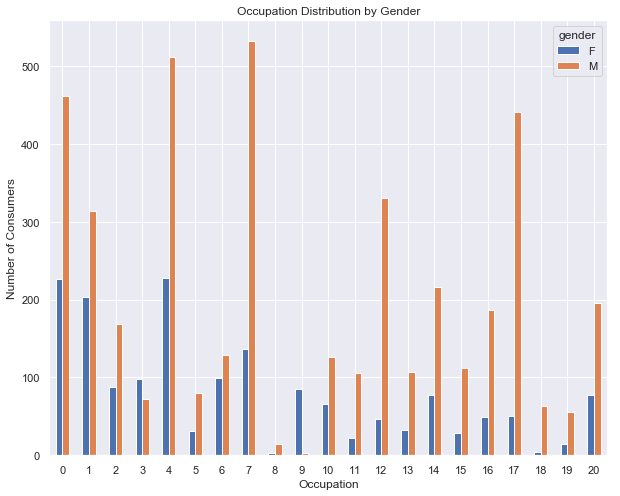

In [84]:
user_info.groupby(['occupation', 'gender'])['user_id'].count().unstack().plot(kind='bar', figsize=(10, 8))
plt.title('Occupation Distribution by Gender')
plt.xticks(rotation=360)
plt.xlabel('Occupation')
plt.ylabel('Number of Consumers');

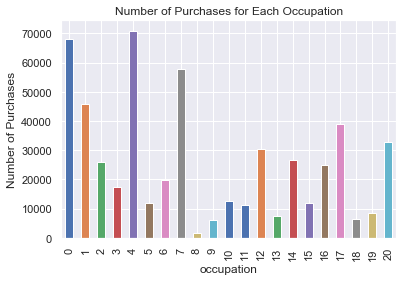

In [102]:
# Number of purchases for each population
retail_data.groupby('occupation').user_id.count().plot(kind='bar')
plt.title('Number of Purchases for Each Occupation')
plt.ylabel('Number of Purchases');

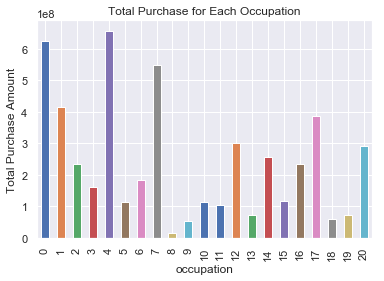

In [85]:
# Dollar amount of purchases for each occupation
user_total_purchase.groupby('occupation').total_purchase.sum().plot(kind='bar')
plt.title('Total Purchase for Each Occupation')
plt.ylabel('Total Purchase Amount');

Since most of the consumers are from occupation 0, 4, 7, 17, it is reasonable that those occupations are making the most puchases. Let's check the average purchase for each occupation.

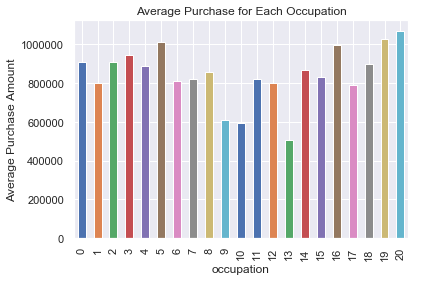

In [86]:
user_total_purchase.groupby('occupation').total_purchase.mean().plot(kind='bar')
plt.title('Average Purchase for Each Occupation')
plt.ylabel('Average Purchase Amount');

From the average point of view, those four occupations are not that dominant.

#### Stay In Current City Years Distribution

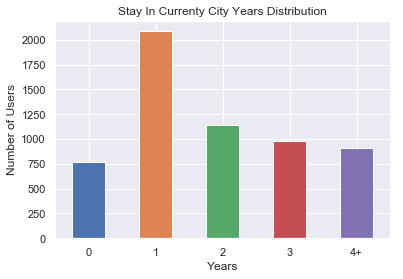

In [87]:
user_info['stay_in_current_city_years'].value_counts().sort_index().plot(kind='bar')
plt.title('Stay In Currenty City Years Distribution')
plt.xticks(rotation=360)
plt.xlabel('Years')
plt.ylabel('Number of Users');

A large proprotion of the current consumers are new citizens to this city. From the decreasing trend, this retail store may have to investigate why people living here longer would become less frequent to purchase at this store.  

#### City Distribution

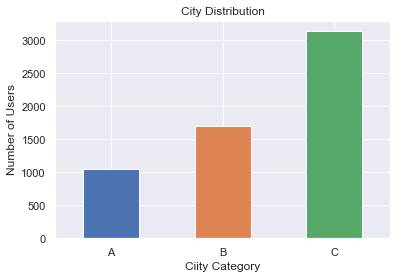

In [88]:
user_info.city_category.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('City Distribution')
plt.xlabel('Ciity Category')
plt.ylabel('Number of Users');

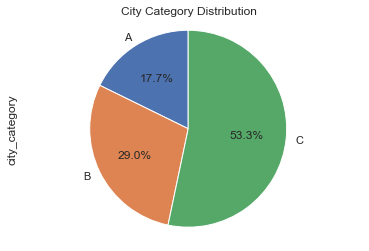

In [89]:
user_info.city_category.value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('City Category Distribution')
plt.axis('equal');

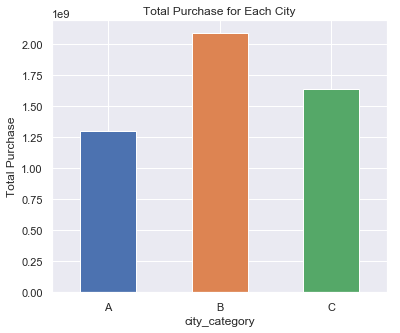

In [90]:
user_total_purchase.groupby('city_category').total_purchase.sum().plot(kind='bar', figsize=(6, 5))
plt.title('Total Purchase for Each City')
plt.xticks(rotation=360)
plt.ylabel('Total Purchase');

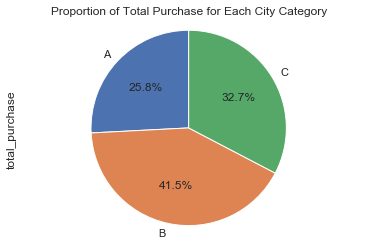

In [91]:
user_total_purchase.groupby('city_category').total_purchase.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Purchase for Each City Category')
plt.axis('equal');

Although number of consumers in city B are in the middle, their purchasing power is the highest among all three city categories. 

#### Age Distribution for Each City Category

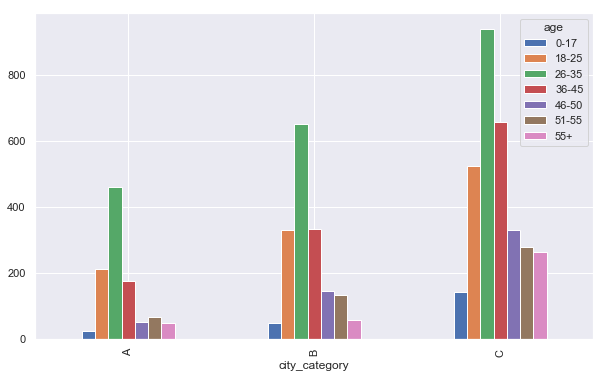

In [92]:
user_info.groupby(['city_category', 'age']).user_id.count().unstack().plot(kind='bar', figsize=(10, 6));

City Category C has a higher proportion of consumers older than 36.